# Important links:
#### [Our World in Data website](https://ourworldindata.org/coronavirus-source-data)
#### [Our World in Data GitHub](https://github.com/owid/covid-19-data/tree/master/public/data/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In C:\Program Files\Python38\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Program Files\Python38\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Program Files\Python38\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Program Files\Python38\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Program Files\Python38\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [2]:
def owid_data(country=None, path=None):
    """
    Plots some of the COVID-19 data for the given country or the whole world.
    
    Parameters
    ----------
    country : str, optional
        International 3-letter country code. If None, plots for the whole
        dataset.

    path: str, optional
        Path for downloaded dataset if offline. If None, only tries to dowload
        from the Internet.
    """
    
    try:
        data = pd.read_csv(
            'https://covid.ourworldindata.org/data/owid-covid-data.csv',
            parse_dates=['date'],
            low_memory=False
        )
    except:
        if path:
            print("Couldn't download, using the given path...")
            data = pd.read_csv(path, parse_dates=['date'], low_memory=False)
        else:
            # didn't want to create an Error, so just went a simple print
            print("Oopsy, couldn't download and no path given...")
            return
    
    # key columns for the graphs
    cols = ['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']
    
    # selecting country or the whole world
    if country:
        data = data[(data.iso_code == country) &
                    (data.total_cases != 0)][cols]
    else:
        country = 'the world'
        data = data[data.total_cases != 0][cols].groupby(
            'date',
            as_index=False
        ).sum()
    
    # plotting data
    plt.style.use('ggplot')  # 'bmh' 'fivethirtyeight' 'ggplot'
    fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(8, 16))
    ax0.set_title(
        f'Cases and deaths of COVID-19 in {country} by date',
        y=1.05
    )
    
    # total cases
    ax0.plot(data.date, data.total_cases, color='blue')
    ax0.set_ylabel('Total cases', color='blue')
    ax0.tick_params('y', color='blue')
    
    # new cases
    ax2 = ax0.twinx()
    ax2.plot(data.date, data.new_cases, color='red')
    ax2.set_ylabel('New cases', color='red')
    ax2.tick_params('y', color='red')
    
    # total deaths
    ax1.plot(data.date, data.total_deaths, color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total deaths', color='blue')
    ax1.tick_params('y', color='blue')
    
    # new deaths
    ax3 = ax1.twinx()
    ax3.plot(data.date, data.new_deaths, color='red')
    ax3.set_ylabel('New deaths', color='red')
    ax3.tick_params('y', color='red')

    plt.show(block=False)

Couldn't download, using the given path...


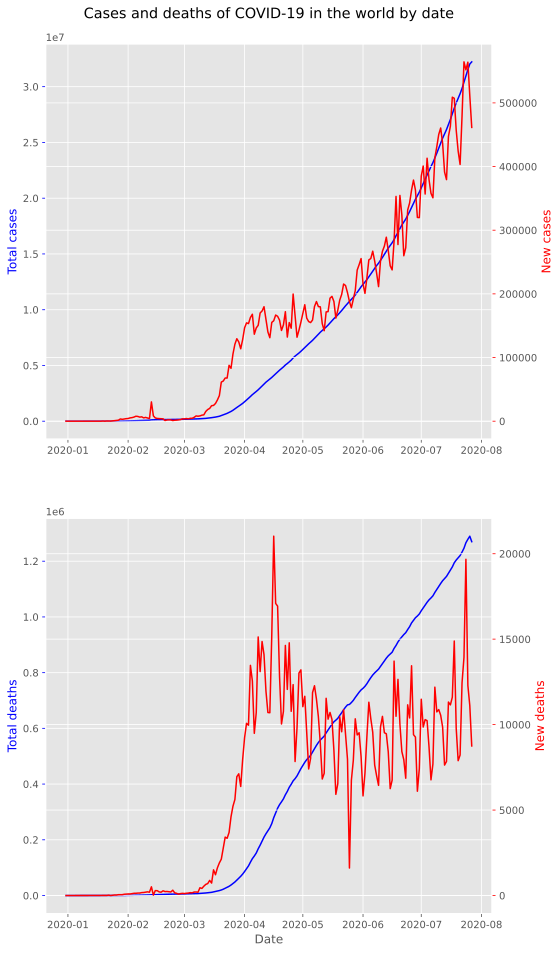

In [5]:
owid_data(path=r'C:\Users\Michael\Documents\Python\Scripts\my_projects\owid-covid-data.csv')

Couldn't download, using the given path...


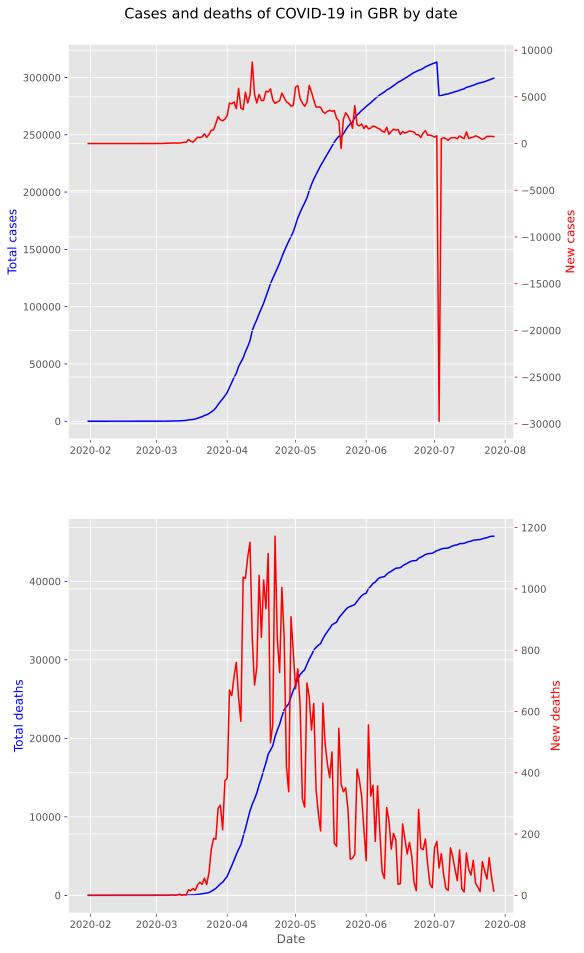

In [4]:
owid_data(
    'GBR',
    r'C:\Users\Michael\Documents\Python\Scripts\my_projects\owid-covid-data.csv'
)

Couldn't download, using the given path...


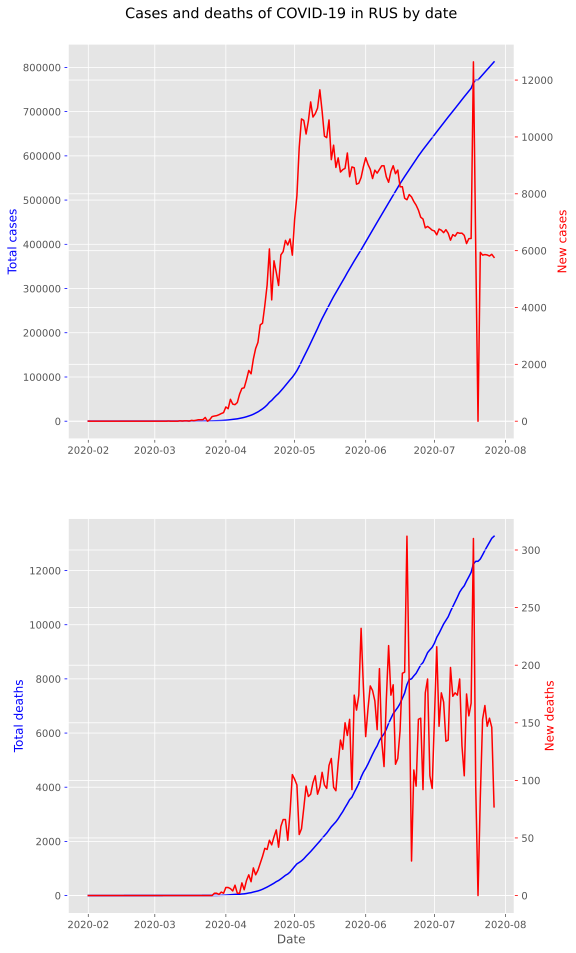

In [3]:
owid_data('RUS', r'C:\Users\Michael\Documents\Python\Scripts\my_projects\owid-covid-data.csv')